> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv(r"C:\Users\User\Desktop\New folder\gun_data.csv")
df_c = pd.read_csv(r"C:\Users\User\Desktop\New folder\U.S. Census Data.csv")

In [3]:
df.head(6)

month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2017-09     Alabama  16717.0             0.0   5734.0    6320.0   221.0   
1  2017-09      Alaska    209.0             2.0   2320.0    2930.0   219.0   
2  2017-09     Arizona   5069.0           382.0  11063.0    7946.0   920.0   
3  2017-09    Arkansas   2935.0           632.0   4347.0    6063.0   165.0   
4  2017-09  California  57839.0             0.0  37165.0   24581.0  2984.0   
5  2017-09    Colorado   4356.0             0.0  15751.0   13448.0  1007.0   

   multiple  admin  prepawn_handgun  ...  returned_other  rentals_handgun  \
0       317    0.0             15.0  ...             0.0              0.0   
1       160    0.0              5.0  ...             0.0              0.0   
2       631    0.0             13.0  ...             0.0              0.0   
3       366   51.0             12.0  ...             0.0              0.0   
4         0    0.0              0.0  ...             0.0              0.0   
5      1062    0.0              0.0  ...             1.0              0.0   

   rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
0               0.0                   9.0                   16.0   
1               0.0                  17.0                   24.0   
2               0.0                  38.0                   12.0   
3               0.0                  13.0                   23.0   
4               0.0                   0.0                    0.0   
5               0.0                   0.0                    0.0   

   private_sale_other  return_to_seller_handgun  return_to_seller_long_gun  \
0                 3.0                       0.0                        0.0   
1                 1.0                       0.0                        0.0   
2                 2.0                       0.0                        0.0   
3                 0.0                       0.0                        2.0   
4                 0.0                       0.0                        0.0   
5                 0.0                       0.0                        0.0   

   return_to_seller_other  totals  
0                     3.0   32019  
1                     0.0    6303  
2                     0.0   28394  
3                     1.0   17747  
4                     0.0  123506  
5                     0.0   35873  

[6 rows x 27 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [5]:
df.describe()

permit  permit_recheck        handgun       long_gun  \
count   12461.000000     1100.000000   12465.000000   12466.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23752.338269     9224.200609    8618.584060    9309.846140   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000        0.000000     865.000000    2078.250000   
50%       518.000000        0.000000    3059.000000    5122.000000   
75%      4272.000000        0.000000    7280.000000   10380.750000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count   5500.000000  12485.000000  12462.000000     10542.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std     1349.478273    783.185073    604.814818        10.907756   
min        0.000000      0.000000      0.000000         0.000000   
25%       17.000000     15.000000      0.000000         0.000000   
50%      121.000000    125.000000      0.000000         0.000000   
75%      354.000000    301.000000      0.000000         5.000000   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other  ...  returned_other  rentals_handgun  \
count      10540.000000    5115.000000  ...     1815.000000       990.000000   
mean           7.834156       0.165591  ...        1.027548         0.076768   
std           16.468028       1.057105  ...        4.386296         0.634503   
min            0.000000       0.000000  ...        0.000000         0.000000   
25%            0.000000       0.000000  ...        0.000000         0.000000   
50%            1.000000       0.000000  ...        0.000000         0.000000   
75%            8.000000       0.000000  ...        0.000000         0.000000   
max          269.000000      49.000000  ...       64.000000        12.000000   

       rentals_long_gun  private_sale_handgun  private_sale_long_gun  \
count        825.000000           2750.000000            2750.000000   
mean           0.087273             14.936000              11.602909   
std            0.671649             71.216021              54.253090   
min            0.000000              0.000000               0.000000   
25%            0.000000              0.000000               0.000000   
50%            0.000000              0.000000               0.000000   
75%            0.000000              2.000000               4.000000   
max           12.000000           1017.000000             777.000000   

       private_sale_other  return_to_seller_handgun  \
count         2750.000000               2475.000000   
mean             1.030182                  0.402020   
std              4.467843                  1.446568   
min              0.000000                  0.000000   
25%              0.000000                  0.000000   
50%              0.000000                  0.000000   
75%              0.000000                  0.000000   
max             71.000000                 28.000000   

       return_to_seller_long_gun  return_to_seller_other         totals  
count                2750.000000             2255.000000   12485.000000  
mean                    0.441818                0.105987   21595.725911  
std                     1.528223                0.427363   32591.418387  
min                     0.000000                0.000000       0.000000  
25%                     0.000000                0.000000    4638.000000  
50%                     0.000000                0.000000   12399.000000  
75%                     0.000000                0.000000   25453.000000  
max                    17.000000                4.000000  541978.000000  

[8 rows x 25 columns]

In [6]:
df_c.head()

Fact Fact Note    Alabama  \
0       Population estimates, July 1, 2016,  (V2016)       NaN  4,863,300   
1  Population estimates base, April 1, 2010,  (V2...       NaN  4,780,131   
2  Population, percent change - April 1, 2010 (es...       NaN      1.70%   
3                  Population, Census, April 1, 2010       NaN  4,779,736   
4  Persons under 5 years, percent, July 1, 2016, ...       NaN      6.00%   

    Alaska    Arizona   Arkansas  California   Colorado Connecticut Delaware  \
0  741,894  6,931,071  2,988,248  39,250,017  5,540,545   3,576,452  952,065   
1  710,249  6,392,301  2,916,025  37,254,522  5,029,324   3,574,114  897,936   
2    4.50%      8.40%      2.50%       5.40%     10.20%       0.10%    6.00%   
3  710,231  6,392,017  2,915,918  37,253,956  5,029,196   3,574,097  897,934   
4    7.30%      6.30%      6.40%       6.30%      6.10%       5.20%    5.80%   

   ... South Dakota Tennessee       Texas       Utah  Vermont   Virginia  \
0  ...       865454   6651194  27,862,596  3,051,217  624,594  8,411,808   
1  ...       814195   6346298  25,146,100  2,763,888  625,741  8,001,041   
2  ...        0.063     0.048      10.80%     10.40%   -0.20%      5.10%   
3  ...       814180   6346105  25,145,561  2,763,885  625,741  8,001,024   
4  ...        0.071     0.061       7.20%      8.30%    4.90%      6.10%   

  Washington West Virginia  Wisconsin  Wyoming  
0  7,288,000     1,831,102  5,778,708  585,501  
1  6,724,545     1,853,011  5,687,289  563,767  
2      8.40%        -1.20%      1.60%    3.90%  
3  6,724,540     1,852,994  5,686,986  563,626  
4      6.20%         5.50%      5.80%    6.50%  

[5 rows x 52 columns]

In [7]:
df_c.tail()

Fact                                          Fact Note Alabama Alaska  \
80   FN             Footnote on this item in place of data     NaN    NaN   
81  NaN                                      Not available     NaN    NaN   
82    S    Suppressed; does not meet publication standards     NaN    NaN   
83    X                                     Not applicable     NaN    NaN   
84    Z  Value greater than zero but less than half uni...     NaN    NaN   

   Arizona Arkansas California Colorado Connecticut Delaware  ...  \
80     NaN      NaN        NaN      NaN         NaN      NaN  ...   
81     NaN      NaN        NaN      NaN         NaN      NaN  ...   
82     NaN      NaN        NaN      NaN         NaN      NaN  ...   
83     NaN      NaN        NaN      NaN         NaN      NaN  ...   
84     NaN      NaN        NaN      NaN         NaN      NaN  ...   

   South Dakota Tennessee Texas Utah Vermont Virginia Washington  \
80          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
81          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
82          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
83          NaN       NaN   NaN  NaN     NaN      NaN        NaN   
84          NaN       NaN   NaN  NaN     NaN      NaN        NaN   

   West Virginia Wisconsin Wyoming  
80           NaN       NaN     NaN  
81           NaN       NaN     NaN  
82           NaN       NaN     NaN  
83           NaN       NaN     NaN  
84           NaN       NaN     NaN  

[5 rows x 52 columns]

In [8]:
df_c.describe()

Fact Fact Note Alabama Alaska Arizona Arkansas  \
count                            80        28      65     65      65       65   
unique                           80        15      65     64      64       64   
top     Persons in poverty, percent       (c)  53.00%  7.30%  50.30%   50.90%   
freq                              1         6       1      2       2        2   

       California Colorado Connecticut Delaware  ... South Dakota Tennessee  \
count          65       65          65       65  ...           65        65   
unique         63       64          63       64  ...           65        64   
top         6.80%    3.30%       0.10%   51.60%  ...        50957     0.048   
freq            2        2           2        2  ...            1         2   

         Texas   Utah  Vermont Virginia Washington West Virginia Wisconsin  \
count       65     65       65       65         65            65        65   
unique      64     64       63       65         65            64        65   
top     50.40%  2.50%  625,741   14.60%      1.90%         1.50%      2.43   
freq         2      2        2        1          1             2         1   

       Wyoming  
count       65  
unique      64  
top      7.10%  
freq         2  

[4 rows x 52 columns]

In [9]:
df_c.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(12485, 27)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [12]:
#using for loop to get the header names of all columns
for i,v in enumerate(df.columns):
    print(i,v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


In [13]:
df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [14]:
#drop duplicates

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [15]:
#replace NaN with "No data"

df.fillna('No data',inplace=True)
df.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [16]:
#Droppping all the columns that is not associated with gun_data and reset its index
df_c = df_c.drop(df_c.index[65: 85]).reset_index()

In [17]:
df_c.fillna(0.0,inplace=True)

In [18]:
#Rename index into state before joining 
df_c = df_c.rename(columns={'index':'State'})

In [19]:
df_c.columns.values

array(['State', 'Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

> The dataframe is cleaned. The duplicates are dropped, NaN values are replaced with 'No Data' for convenience and the useless columns are dropped. The column header 'index' is renamed as 'State' as the name more appropriately describes the column.

### Research Question 1 : Is there a seasonal pattern for firearm shopping?

In [20]:
gun_total = df[['month','totals']]

In [21]:
gun_total = gun_total.set_index('month')

In [22]:
gun_total.head()

totals
month          
2017-09   32019
2017-09    6303
2017-09   28394
2017-09   17747
2017-09  123506

In [23]:
gun_total = gun_total[::-1]

In [24]:
gun_total.head()

totals
month          
1998-11     107
1998-11     241
1998-11     408
1998-11     361
1998-11      24

In [25]:
total_groupby_month = gun_total.groupby('month').sum()

In [26]:
total_groupby_month.head(10)

totals
month          
1998-11   21176
1998-12  870722
1999-01  585974
1999-02  690215
1999-03  741687
1999-04  638666
1999-05  569220
1999-06  564912
1999-07  579634
1999-08  694980

Text(0.5, 0, 'Background Checks')

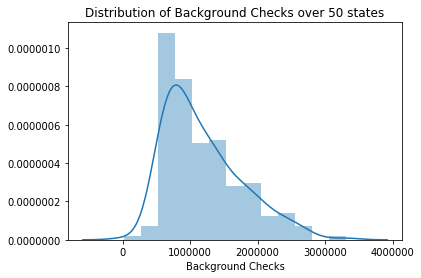

In [27]:
ax = sns.distplot(total_groupby_month)
ax.set_title('Distribution of Background Checks over 50 states')
ax.set_xlabel('Background Checks')

In [28]:
ax = total_groupby_month.plot(figsize=(18,5))
ax.set_title('Gun Purchases over years for 50 states', fontsize=20)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Background Checks', fontsize=15)

Text(0, 0.5, 'Background Checks')

>Note: We can see a sort of pattern here. But this is too broad to confirm a seasonal pattern. Let's take a look at the pattern closely in each year at the next step

>As you can see from the above graph, from 2007, the number is going up, so the yearly graph will be divided into two graphs, one with year from 1999 to 2006, the other one with year from 2007 to 2016. The years 1998 and 2017 are excluded because their data are not complete(including less than 12 months）

In [29]:
ax = total_groupby_month.loc['1999':'2000'].plot(figsize=(20,10),fontsize=15) #add the year 1999's plot first
legend =['1999']
month_list = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i in range(2000,2007): #excluding 1998 and 2017, for they are not complete
    ax = total_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(month_list,fontdict={'fontsize': 15,'fontweight': 15})
ax.set_title('Yearly Pattern 1999-2006', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Guns purchased', fontsize=15)
ax.plot()

[]

In [30]:
ax = total_groupby_month.loc['2007':'2008'].plot(figsize=(20,10),fontsize=15) #add the year 1999's plot first
legend =['2007']
month_list = pd.Series(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i in range(2008,2017): #excluding 1998 and 2017, for they are not complete
    ax = total_groupby_month.loc[str(i):str(i+1)].plot(ax=ax)
    legend.append(str(i))
ax.legend(legend,fontsize=20)
ax.set_xticks(np.arange(12))
ax.set_xticklabels(month_list,fontdict={'fontsize': 15,'fontweight': 15})
ax.set_title('Yearly Pattern 1999-2006', fontsize=25)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Guns purchased', fontsize=15)
ax.plot()

[]

>As we can see from both the plots, there is a clear pattern that the total number of background checks stays low during the summer and peaks at winter. So yes, there is a seasonal pattern for firearm shopping.

### Research Question 2 : Hand Gun Trend from 2011 to 2017

In [31]:
#Display g_017
g_17 = df[df['month'] == '2017-09' ]
g_15 = df[df['month'] == '2015-09' ]
g_13 = df[df['month'] == '2013-09' ]
g_11 = df[df['month'] == '2011-09' ]

In [32]:
g_17.head()

month       state permit permit_recheck handgun long_gun other  multiple  \
0  2017-09     Alabama  16717              0    5734     6320   221       317   
1  2017-09      Alaska    209              2    2320     2930   219       160   
2  2017-09     Arizona   5069            382   11063     7946   920       631   
3  2017-09    Arkansas   2935            632    4347     6063   165       366   
4  2017-09  California  57839              0   37165    24581  2984         0   

  admin prepawn_handgun  ... returned_other rentals_handgun rentals_long_gun  \
0     0              15  ...              0               0                0   
1     0               5  ...              0               0                0   
2     0              13  ...              0               0                0   
3    51              12  ...              0               0                0   
4     0               0  ...              0               0                0   

  private_sale_handgun private_sale_long_gun private_sale_other  \
0                    9                    16                  3   
1                   17                    24                  1   
2                   38                    12                  2   
3                   13                    23                  0   
4                    0                     0                  0   

  return_to_seller_handgun return_to_seller_long_gun return_to_seller_other  \
0                        0                         0                      3   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         2                      1   
4                        0                         0                      0   

   totals  
0   32019  
1    6303  
2   28394  
3   17747  
4  123506  

[5 rows x 27 columns]

In [33]:
g_15.head()

month       state permit permit_recheck handgun long_gun other  \
1320  2015-09     Alabama  20999        No data   16038    13392   710   
1321  2015-09      Alaska    184        No data    2294     3037   130   
1322  2015-09     Arizona   4161        No data   10378     7529   677   
1323  2015-09    Arkansas   6286        No data    5356     6595   146   
1324  2015-09  California  64698        No data   31897    24471  3429   

      multiple admin prepawn_handgun  ... returned_other rentals_handgun  \
1320       819     0              13  ...              0         No data   
1321       159     0               2  ...              0         No data   
1322       520     0               2  ...              0         No data   
1323       353     3               5  ...              0         No data   
1324         0     0               0  ...              0         No data   

     rentals_long_gun private_sale_handgun private_sale_long_gun  \
1320          No data                    4                     9   
1321          No data                    6                     5   
1322          No data                    5                     6   
1323          No data                    6                     4   
1324          No data                    0                     0   

     private_sale_other return_to_seller_handgun return_to_seller_long_gun  \
1320                  0                        2                         1   
1321                  0                        0                         0   
1322                  1                        1                         0   
1323                  0                        2                         0   
1324                  0                        0                         0   

     return_to_seller_other  totals  
1320                      0   56228  
1321                      0    6195  
1322                      0   25464  
1323                      0   21834  
1324                      0  125441  

[5 rows x 27 columns]

In [34]:
g_13.head()

month       state permit permit_recheck handgun long_gun other  \
2640  2013-09     Alabama  16722        No data   11406    13077   566   
2641  2013-09      Alaska    176        No data    2152     3073   132   
2642  2013-09     Arizona   4013        No data    8488     7654   491   
2643  2013-09    Arkansas   2518        No data    3773     6273    70   
2644  2013-09  California  36741        No data   27422    39102    75   

      multiple admin prepawn_handgun  ... returned_other rentals_handgun  \
2640       616     0               1  ...        No data         No data   
2641       154     0               6  ...        No data         No data   
2642       372     0               7  ...        No data         No data   
2643       291     0               5  ...        No data         No data   
2644         0     0               0  ...        No data         No data   

     rentals_long_gun private_sale_handgun private_sale_long_gun  \
2640          No data                    0                     0   
2641          No data                    0                     0   
2642          No data                    0                     0   
2643          No data                    0                     0   
2644          No data                    0                     0   

     private_sale_other return_to_seller_handgun return_to_seller_long_gun  \
2640                  0                  No data                         0   
2641                  0                  No data                         0   
2642                  0                  No data                         0   
2643                  0                  No data                         0   
2644                  0                  No data                         0   

     return_to_seller_other  totals  
2640                      0   46263  
2641                      0    6047  
2642                      0   22904  
2643                      0   16195  
2644                      0  104067  

[5 rows x 27 columns]

In [35]:
g_11.head()

month       state permit permit_recheck handgun long_gun other  \
3960  2011-09     Alabama    408        No data    9549    10728   196   
3961  2011-09      Alaska      0        No data    1965     3014    68   
3962  2011-09     Arizona   2413        No data    7936     6614   280   
3963  2011-09    Arkansas   1756        No data    4168     6849    70   
3964  2011-09  California  23573        No data   22197    23657    39   

      multiple admin prepawn_handgun  ... returned_other rentals_handgun  \
3960       519     0               6  ...        No data         No data   
3961       126     0               7  ...        No data         No data   
3962       393     0               8  ...        No data         No data   
3963       350     0               6  ...        No data         No data   
3964         0     0               0  ...        No data         No data   

     rentals_long_gun private_sale_handgun private_sale_long_gun  \
3960          No data              No data               No data   
3961          No data              No data               No data   
3962          No data              No data               No data   
3963          No data              No data               No data   
3964          No data              No data               No data   

     private_sale_other return_to_seller_handgun return_to_seller_long_gun  \
3960            No data                  No data                   No data   
3961            No data                  No data                   No data   
3962            No data                  No data                   No data   
3963            No data                  No data                   No data   
3964            No data                  No data                   No data   

     return_to_seller_other totals  
3960                No data  25550  
3961                No data   5603  
3962                No data  19614  
3963                No data  17056  
3964                No data  70043  

[5 rows x 27 columns]

In [36]:
def find_sum(g):
    return g['handgun'].sum()

In [38]:
find_sum(g_17)

478082.0

In [39]:
find_sum(g_15)

506877.0

In [40]:
find_sum(g_13)

413380.0

In [41]:
find_sum(g_11)

316724.0

In [47]:
year = [2011,2013,2015,2017]
sum1 = np.array([478082.0,506877.0,413380.0,316724.0])

In [48]:
y = np.arange(len(year))
y

array([0, 1, 2, 3])

No handles with labels found to put in legend.


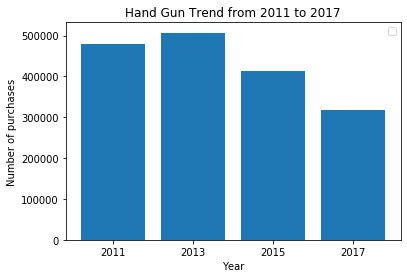

In [50]:
plt.xticks(y, year)
plt.xlabel('Year')
plt.ylabel('Number of purchases')
plt.title('Hand Gun Trend from 2011 to 2017')
plt.bar(y, sum1)
plt.legend()

> It is clear from the above plot that the number of handguns sold was maximumduring the year 2013 and after 2013 there was a gradual decrease in the number of handgun purchases in the consequent years ,i.e. 2015 and 2017.  

<a id='conclusions'></a>
## Conclusions

> 1.Is there a seasonal pattern for firearm shopping?
> There is a clear pattern that the total number of background checks stays low during the summer and peaks at winter. More guns are purchased during the winter season than during summer. So yes, there is a seasonal pattern for firearm shopping.

> 2.What is the handgun sales trend from 2011 to 2017?
> The number of purchases of handgun during the year 2011,2013,2015,2017 is in the order:
* 2011
* 2013
* 2017
* 2015


## Limitations

> I replaced guns missing data values with a default value of each columns and remove 'Fact Note' column since it has exceeding number of Nan values.Missing value can be caused by nonreponse or limitation regulation or lack of gathering data. My solution is to replace missing data with a default value and drop null columns. This process is also not time consuming.

> There is a little inconsistency during the summer of 2016, which we need to research further into what happened before or during that summer to come to a conclusion about that data.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])